In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import interpolate

In [2]:

df_medida = pd.read_excel('Simul X Medidas\Sierpinski_Half_v1\Sierpinski_v1.xlsx', 'Medida', decimal=',')
df_medida.dtypes
df_medida.rename(columns = {'Frequency': 'freq', ' Formatted Data':'S11_MeasSKY'}, inplace = True)

df_medida['freq'] = df_medida['freq'].astype(float)


df_medida.dtypes

freq           float64
S11_MeasSKY    float64
dtype: object

In [3]:

df_medida = pd.read_excel('Simul X Medidas\Sierpinski_Half_v1\Sierpinski_v1.xlsx', 'INPE', decimal=',')
df_medida.dtypes
df_medida.rename(columns = {'Frequency (Hz)': 'freq', 'dB':'S11_MeasINPE'}, inplace = True)

# df_medida['freq'] = df_medida['freq'].astype(float)


df_medida.dtypes

freq              int64
S11_MeasINPE    float64
dtype: object

In [4]:
df_ads = pd.read_excel('Simul X Medidas\Sierpinski_Half_v1\Sierpinski_v1.xlsx', 'ADS', decimal=',')
df_ads.dtypes
df_ads.rename(columns = {'Frequency / GHz':'freq', 'dB(S11_fitted)':'S11_ADS'}, inplace = True)

# df_ads['freq'] = round(df_cst['freq'],2)*10**9
df_ads.dtypes
# df_ads['S11_ADS']

freq       float64
S11_ADS    float64
dtype: object

In [5]:
df_cst = pd.read_excel('Simul X Medidas\Sierpinski_Half_v1\Sierpinski_v1.xlsx', 'CST', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency':'freq', 'S1;1':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst['freq']

0       1.000000e+08
1       1.200000e+08
2       1.400000e+08
3       1.500000e+08
4       1.700000e+08
            ...     
996     1.793000e+10
997     1.795000e+10
998     1.796000e+10
999     1.798000e+10
1000    1.800000e+10
Name: freq, Length: 1001, dtype: float64

In [6]:
df_medida2 = pd.read_excel('Simul X Medidas\Sierpinski_Half_v1\Sierpinski_v1.xlsx', 'USP1', decimal=',')
df_medida2.dtypes
df_medida2.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP1'}, inplace = True)
df_medida2 = df_medida2.drop(['R'], axis= 1)

df_medida2['freq'] = df_medida2['freq'].astype(float)


df_medida2.dtypes

freq            float64
S11_MeasUSP1    float64
dtype: object

In [7]:
df_medida3 = pd.read_excel('Simul X Medidas\Sierpinski_Half_v1\Sierpinski_v1.xlsx', 'USP2.1', decimal=',')
df_medida3.dtypes
df_medida3.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP2'}, inplace = True)
df_medida3 = df_medida3.drop(['R'], axis= 1)

df_medida3['freq'] = df_medida3['freq'].astype(float)


df_medida3.dtypes

freq            float64
S11_MeasUSP2    float64
dtype: object

In [8]:
df_medida4 = pd.read_excel('Simul X Medidas\Sierpinski_Half_v1\Sierpinski_v1.xlsx', 'USP3', decimal=',')
df_medida4.dtypes
df_medida4.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP3'}, inplace = True)
df_medida4 = df_medida4.drop(['R'], axis= 1)

df_medida4['freq'] = df_medida4['freq'].astype(float)


df_medida4.dtypes

freq            float64
S11_MeasUSP3    float64
dtype: object

In [9]:
# df = pd.merge_ordered(df_cst, df_ads, on='freq')

df1 = df_ads.merge(df_cst, how= 'outer', on='freq')
df = df1.merge(df_medida, how= 'outer', on='freq')
df.sort_values(by='freq', inplace=True)

# df= df.loc[df['freq']<=15e9]

df

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,freq,S11_ADS,S11_CST,S11_MeasINPE
0,0.000000e+00,-4.243041e-14,NaN,NaN
1,9.330637e+00,-1.350058e-14,NaN,NaN
2,9.330637e+01,-1.832222e-14,NaN,NaN
3,9.330637e+02,-6.682789e-13,NaN,NaN
4,9.330637e+03,-6.472952e-11,NaN,NaN
...,...,...,...,...
15628,1.799600e+10,NaN,NaN,-7.914797
15629,1.799700e+10,NaN,NaN,-7.898809
15630,1.799800e+10,NaN,NaN,-7.936086
15631,1.799900e+10,NaN,NaN,-7.911622


In [10]:
nfreq = np.arange(3E9, 18E9, 10E6) # % desejada

f= interpolate.interp1d(df_ads['freq'], df_ads['S11_ADS'])

y_ads = f(nfreq)

y_ads

array([-4.62080356, -4.68162335, -4.74175533, ..., -5.3737837 ,
       -5.29882605, -5.22386839])

In [11]:
f= interpolate.interp1d(df_cst['freq'], df_cst['S11_CST'])

y_cst = f(nfreq)

y_cst

array([ -1.662641  ,  -1.68532225,  -1.7080035 , ..., -14.9978855 ,
       -15.090116  , -15.1813795 ])

In [12]:
f= interpolate.interp1d(df_medida['freq'], df_medida['S11_MeasINPE'])

y_med1 = f(nfreq)

y_med1

array([-0.7520183, -0.7560909, -0.7490751, ..., -7.818168 , -7.86913  ,
       -7.916314 ])

In [13]:
f= interpolate.interp1d(df_medida2['freq'], df_medida2['S11_MeasUSP1'])

y_med2 = f(nfreq)

y_med2

array([-0.72103686, -0.71918137, -0.72406168, ..., -7.80443576,
       -7.85755003, -7.90586179])

In [14]:
f= interpolate.interp1d(df_medida3['freq'], df_medida3['S11_MeasUSP2'])

y_med3 = f(nfreq)

y_med3

array([-0.98067217, -1.00593978, -1.02983515, ..., -7.55467009,
       -7.57574922, -7.59494763])

In [15]:
f= interpolate.interp1d(df_medida4['freq'], df_medida4['S11_MeasUSP3'])

y_med4 = f(nfreq)

y_med4

array([-1.00942523, -1.07262026, -1.14088119, ..., -7.66080881,
       -7.70060319, -7.74144134])

In [16]:
# d= {'freq': nfreq, 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_MeasSKY':y_med1,'S11_MeasUSP1':y_med2, 'S11_MeasUSP2':y_med3, 'S11_MeasUSP3':y_med4}

d= { 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_MeasINPE':y_med1, 'S11_MeasUSP3':y_med4}

df = pd.DataFrame(d)
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')
corr_spearman = df.corr(method='spearman')

corr_pearson

,S11_ADS,S11_CST,S11_MeasINPE,S11_MeasUSP3
S11_ADS,1.000000,0.243465,0.069139,0.081860
S11_CST,0.243465,1.000000,0.761119,0.807831
S11_MeasINPE,0.069139,0.761119,1.000000,0.953417
S11_MeasUSP3,0.081860,0.807831,0.953417,1.000000


<Figure size 4500x3600 with 0 Axes>

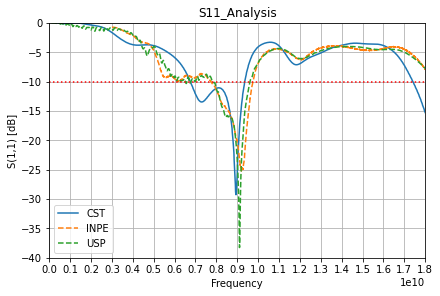

In [17]:
highest_freq = max([max(df_cst['freq']),max(df_ads['freq'])])


figure(figsize=(15, 12), dpi=300)
fig, ax = plt.subplots( layout = 'constrained')
# ax.plot(df_ads['freq'], df_ads['S11_ADS'], label ='ADS')
ax.plot(df_cst['freq'], df_cst['S11_CST'], label ='CST')
ax.plot(df_medida['freq'], df_medida['S11_MeasINPE'], '--',label ='INPE',)
# ax.plot(df_medida2['freq'], df_medida2['S11_Meas2'], label ='Medida 2')
ax.plot(df_medida4['freq'], df_medida4['S11_MeasUSP3'],'--', label ='USP')

plt.axhline(y=-10, ls=':', c='r') #Horizontal Line
plt.xticks(range(0, 19*10**9, 1*10**9)) #x scale
ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, highest_freq), ylim=(-40, 0))
ax.grid()

ax.legend()

In [16]:
import pandas as pd
df_cst = pd.read_excel('Simul X Medidas\\Sierpinski_Half_v1\\Sierpinski_v1.xlsx', 'CST_40', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency / GHz':'freq', 'S1,1/abs,dB':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst

,freq,S11_CST
0,1.000000e+08,1.077345e-07
1,1.400000e+08,-3.650453e-03
2,1.800000e+08,-8.423286e-03
3,2.200000e+08,-1.424536e-02
4,2.600000e+08,-2.102056e-02
...,...,...
996,3.984000e+10,-1.213467e+01
997,3.988000e+10,-1.197428e+01
998,3.992000e+10,-1.182304e+01
999,3.996000e+10,-1.168102e+01


In [17]:
df_medida2 = pd.read_excel('Simul X Medidas\\Sierpinski_Half_v1\\Sierpinski_v1.xlsx', 'USP_26G5', decimal=',')
df_medida2.dtypes
df_medida2.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP1'}, inplace = True)


df_medida2['freq'] = df_medida2['freq'].astype(float)


df_medida2

,freq,S11_MeasUSP1
0,1.000000e+08,0.002223
1,1.082500e+08,0.001829
2,1.165000e+08,0.004212
3,1.247500e+08,0.003478
4,1.330000e+08,0.001299
...,...,...
3196,2.646700e+10,-8.091692
3197,2.647525e+10,-8.084148
3198,2.648350e+10,-8.087072
3199,2.649175e+10,-8.096384


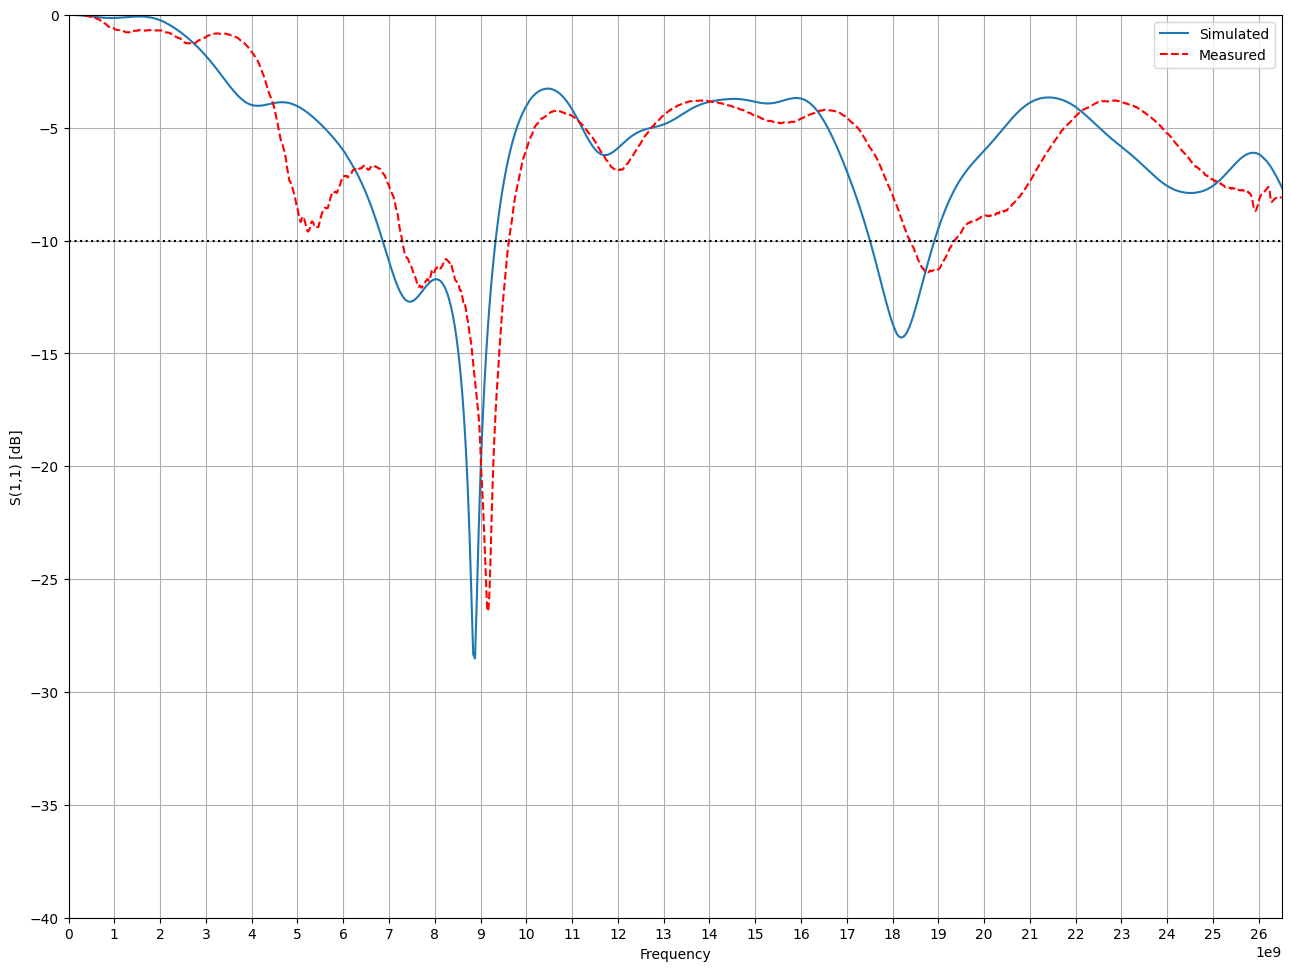

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( layout = 'constrained', figsize=(6.4*2,4.8*2))
# ax.plot(df_ads['freq'], df_ads['S11_ADS'], label ='ADS')
ax.plot(df_cst['freq'], df_cst['S11_CST'], label ='Simulated')
# ax.plot(nfreq, y, label ='Med1_inter')
ax.plot(df_medida2['freq'], df_medida2['S11_MeasUSP1'], '--',label ='Measured', color = 'red')
# ax.plot(df_medida2['freq'], df_medida2['S11_MeasSKY2'], label ='SKY 2')
# ax.plot(df_medida3['freq'], df_medida3['S11_MeasUSP1'], '--',label ='USP 1',)
# ax.plot(df_medida4['freq'], df_medida4['S11_MeasUSP2'],'--', label ='USP')


plt.axhline(y=-10, ls=':', c='#000000') #Horizontal Line
plt.ticklabel_format(axis='x', style='sci', scilimits=(9,9))
plt.xticks(range(0, 27*10**9, 1*10**9)) #x scale
ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
# ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, 26.5*10**9), ylim=(-40, 0))
ax.grid()
ax.legend()